In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP5000
n=5000

#Fitxer que contè en TPM els gens més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensTPM_noversio_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000210082,ENSG00000198712,ENSG00000198899,ENSG00000198938,ENSG00000198804,ENSG00000198886,ENSG00000198763,ENSG00000198888,ENSG00000198727,...,ENSG00000159899,ENSG00000136738,ENSG00000169249,ENSG00000162572,ENSG00000136870,ENSG00000068976,ENSG00000198576,ENSG00000153814,ENSG00000120688,ENSG00000243156
0,Brain - Cortex,56000.0,59480,57190,43790,51600,48610,32840,36570,32050,...,14.61,21.06,20.10,23.18,22.16,19.900,29.320,18.290,16.05,21.92
1,Brain - Cerebellum,32100.0,49380,50440,37730,27340,45150,25620,30180,30980,...,63.17,27.04,36.63,55.75,15.87,22.930,3.366,33.290,18.19,61.41
2,Brain - Cortex,59730.0,62980,66050,48110,75880,63390,32590,45930,31380,...,14.49,13.23,17.80,17.12,15.12,30.520,35.260,12.640,14.07,14.95
3,Brain - Cerebellum,44320.0,51110,50770,43170,60530,54370,28230,36340,31450,...,70.56,23.99,31.84,42.21,11.64,20.340,1.975,22.170,13.06,59.63
4,Brain - Cortex,45870.0,62790,47390,56100,70590,45050,36770,38690,29500,...,13.05,16.75,19.56,24.65,14.36,15.480,45.770,15.490,15.16,17.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,66360.0,60430,54270,52260,54240,42870,26570,36790,26310,...,15.63,15.45,15.96,17.51,16.93,17.400,23.400,17.230,13.63,16.15
2637,Brain - Cerebellum,39830.0,44910,49800,38950,39790,52370,29630,35390,31610,...,62.63,25.78,36.87,39.41,16.79,18.300,3.761,24.000,17.22,55.41
2638,Brain - Cortex,56930.0,47760,49580,42730,51040,50630,38830,40840,30990,...,19.31,14.07,31.90,15.76,14.87,19.150,22.670,17.010,17.35,17.43
2639,Brain - Cerebellum,45720.0,56890,60010,41590,33670,46580,38390,42170,42080,...,65.30,23.64,16.05,12.38,12.56,5.920,4.626,33.850,22.29,52.17


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

33 components expliquen un 95% de la variança. De 5000 dimensions a 33


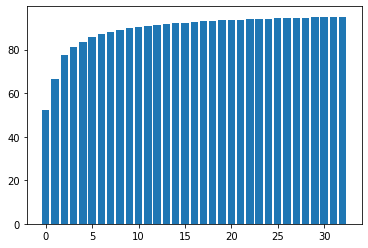

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,20.034444,-8.611365,-14.536242,-7.653834,5.605268,-13.071759,-8.005811,-9.242085,3.157056,-14.804653,...,4.047473,2.103263,2.350001,0.472284,1.243156,-1.502455,-0.342598,-2.380081,-0.268300,-1.312502
1,-74.691348,42.055470,-9.478265,5.816057,4.444657,-1.966167,-0.908163,-5.890464,-0.778475,1.043491,...,0.049336,0.023440,2.096916,1.491858,0.306330,2.845103,-1.774244,2.060787,-2.285578,-3.041940
2,76.250129,20.648926,-12.614649,-12.006871,-1.358445,13.850261,3.130339,29.363341,2.477388,-8.241155,...,-0.892514,-3.894621,1.302731,5.147725,-3.726983,-1.180641,1.829230,-0.318997,0.512683,2.296520
3,119.739290,31.763735,-16.454606,-3.849830,-6.248273,-3.254599,8.333760,-2.157594,-7.915184,-0.403661,...,0.051484,5.664603,-2.369738,-0.423436,1.406205,2.177697,0.308526,0.272090,-1.036947,-1.574982
4,45.403326,1.578882,-12.665829,-6.747091,11.835536,-5.516616,11.433354,-3.272921,-5.293998,-1.694249,...,-1.367697,0.759010,-1.425545,2.150849,3.292462,3.886274,-0.664164,-2.660161,1.166613,1.423569


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,SMTSD
0,20.034444,-8.611365,-14.536242,-7.653834,5.605268,-13.071759,-8.005811,-9.242085,3.157056,-14.804653,...,2.103263,2.350001,0.472284,1.243156,-1.502455,-0.342598,-2.380081,-0.268300,-1.312502,Brain - Hippocampus
1,-74.691348,42.055470,-9.478265,5.816057,4.444657,-1.966167,-0.908163,-5.890464,-0.778475,1.043491,...,0.023440,2.096916,1.491858,0.306330,2.845103,-1.774244,2.060787,-2.285578,-3.041940,Brain - Cerebellum
2,76.250129,20.648926,-12.614649,-12.006871,-1.358445,13.850261,3.130339,29.363341,2.477388,-8.241155,...,-3.894621,1.302731,5.147725,-3.726983,-1.180641,1.829230,-0.318997,0.512683,2.296520,Brain - Frontal Cortex (BA9)
3,119.739290,31.763735,-16.454606,-3.849830,-6.248273,-3.254599,8.333760,-2.157594,-7.915184,-0.403661,...,5.664603,-2.369738,-0.423436,1.406205,2.177697,0.308526,0.272090,-1.036947,-1.574982,Brain - Nucleus accumbens (basal ganglia)
4,45.403326,1.578882,-12.665829,-6.747091,11.835536,-5.516616,11.433354,-3.272921,-5.293998,-1.694249,...,0.759010,-1.425545,2.150849,3.292462,3.886274,-0.664164,-2.660161,1.166613,1.423569,Brain - Frontal Cortex (BA9)


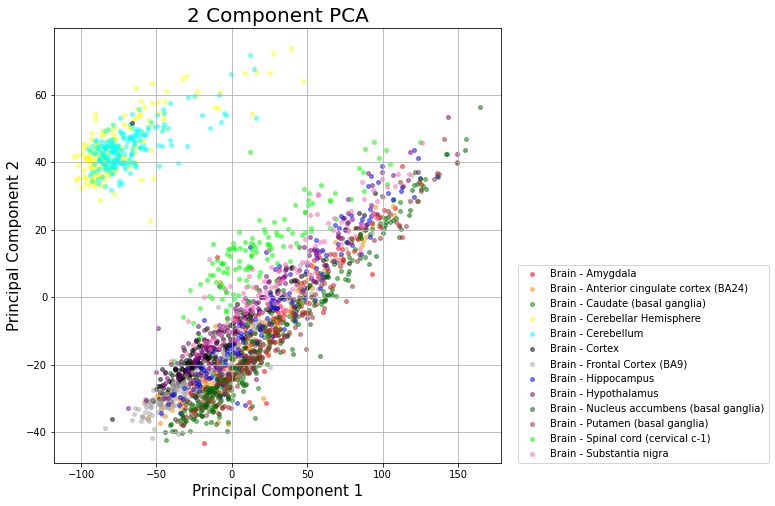

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

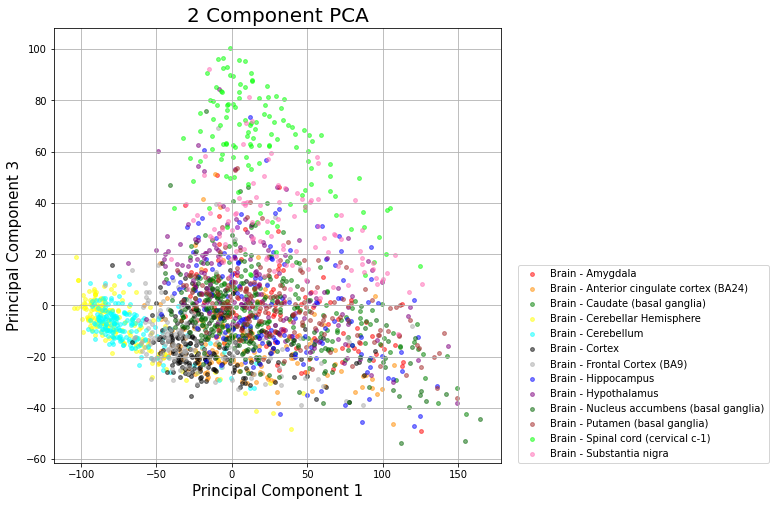

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.011s...
[t-SNE] Computed neighbors for 2112 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 11.446575
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.680405
[t-SNE] KL divergence after 1000 iterations: 0.976165


,X,Y,Tipus Teixit
0,-13.530315,-9.380986,Brain - Hippocampus
1,27.602325,44.950813,Brain - Cerebellum
2,-3.289572,-26.149523,Brain - Frontal Cortex (BA9)
3,4.600620,-34.758694,Brain - Nucleus accumbens (basal ganglia)
4,0.214850,-7.322633,Brain - Frontal Cortex (BA9)


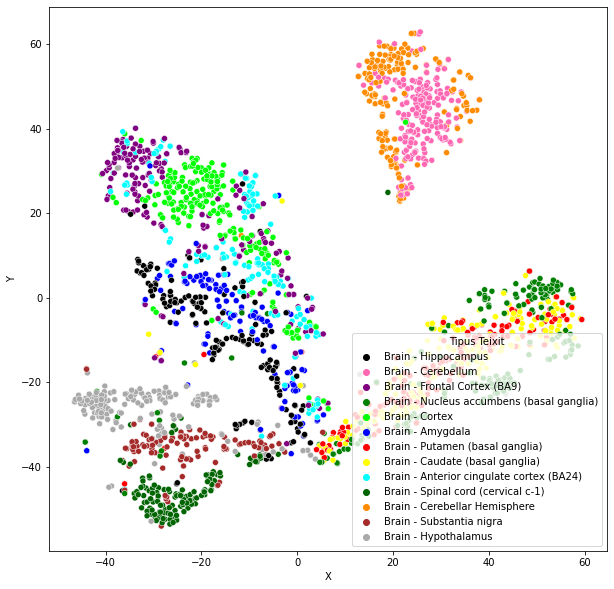

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
34 # Prec. mitjana:  76.37306626128947  desv.:  2.429664043488761  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
23 # Prec. mitjana:  76.61048019315031  desv.:  1.7788471752672386  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
20 # Prec. mitjana:  76.70481981579182  desv.:  1.5640920486109513  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
3 # Prec. mitjana:  77.27219887328982  desv.:  1.4896604006751708  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
17 # Prec. mitjana:  76.75266028793705  desv.:  2.791766423077369  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
6 # Prec. mitjana:  77.13158365376017  desv.:  2.4261154166337824  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
38 # Prec. mitjana:  76.08937673254046  desv.:  2.210878965231358  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
7 # Prec. mitjana:  77.1309129929357  desv.:  1.939442880363321  paràmetres:  {'n_nei

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,27,2,0,0,0,0,1,3,1,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,19,0,0,0,1,8,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,35,0,0,0,1,1,0,5,10,0,0
Brain - Cerebellar Hemisphere,0,0,0,45,6,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,1,54,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,41,0,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),3,4,0,0,0,1,25,0,0,0,0,0,0
Brain - Hippocampus,6,2,1,0,0,0,1,29,0,0,0,1,1
Brain - Hypothalamus,0,0,0,1,0,0,0,0,32,1,0,1,4


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
52 # Prec. mitjana:  18.371411964589107  desv.:  0.4698482615797671  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
54 # Prec. mitjana:  15.009836358758829  desv.:  0.4375827613169592  paràmetres:  {'C': 0.01, 'gamma': 0.001}
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
55 # Prec. mitjana:  10.038004113386389  desv.:  0.19

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,33,0,0,0,0,0,0,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,27,0,0,0,0,1,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,48,0,0,0,0,0,0,1,2,0,0
Brain - Cerebellar Hemisphere,0,0,0,51,0,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,0,55,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,42,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,0,32,0,0,0,0,0,0
Brain - Hippocampus,2,5,0,0,0,0,0,34,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,34,1,0,0,3


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
128 # Prec. mitjana:  51.32612000357686  desv.:  2.1579815876805446  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
127 # Prec. mitjana:  51.42090673343469  desv.:  2.170474878231674  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
129 # Prec. mitjana:  51.231333273719045  desv.:  2.3223793820842342  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
129 # Prec. mitjana:  51.231333273719045  desv.:  2.3223793820842342  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
129 # Prec. mitjana:  51.231333273719045  desv.:  2.3223793820842342  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
129 # Prec. mitjana:  51.231333273719045  desv.:  2.3223793820842342  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  38.446973084145576  desv.:  1.5931078396866447  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  32.101627470267374  desv.:  1.3523733390

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,24,0,0,0,0,0,2,6,2,0,0,0,0
Brain - Anterior cingulate cortex (BA24),2,20,0,0,0,1,4,1,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,33,0,0,0,1,0,0,6,10,0,1
Brain - Cerebellar Hemisphere,0,1,0,42,5,0,0,0,1,0,0,2,0
Brain - Cerebellum,0,2,0,4,48,1,0,0,0,0,0,0,0
Brain - Cortex,0,2,0,0,0,33,5,0,0,1,0,0,1
Brain - Frontal Cortex (BA9),1,3,0,0,0,3,23,0,2,0,0,0,1
Brain - Hippocampus,1,2,0,0,0,1,2,29,2,1,1,1,1
Brain - Hypothalamus,1,1,0,0,0,3,1,1,27,1,0,1,3


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  74.48023786103907  desv.:  1.7088667237826145  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
55 # Prec. mitjana:  80.72833765536977  desv.:  1.8061516236564557  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
54 # Prec. mitjana:  81.20271841187517  desv.:  1.483121155182287  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
52 # Prec. mitjana:  81.58119467048198  desv.:  1.2822597085877814  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
53 # Prec. mitjana:  81.20383617991594  desv.:  1.2528054501341566  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
51 # Prec. mitjana:  81.7253867477421  desv.:  1.9235319954025345  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
65 # Prec. mitjana:  77.0381382455513  desv.:  2.2103422649400093  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
48 # Prec. mitjana:  82.62451935974246  desv.:  1.1380961158466016  paràmetres:  {'max_depth': 7, 'n_estimator

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,31,0,0,0,0,0,0,1,1,0,0,0,1
Brain - Anterior cingulate cortex (BA24),1,22,0,0,0,0,5,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,43,0,0,0,1,0,0,2,6,0,0
Brain - Cerebellar Hemisphere,0,0,0,47,4,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,3,52,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,42,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,3,28,0,1,0,0,0,0
Brain - Hippocampus,2,2,1,0,0,0,1,34,0,1,0,0,0
Brain - Hypothalamus,0,0,0,0,0,0,0,1,33,1,0,1,3


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 77.65%
Model kNN, Accuracy de test és: 82.04%
##################################################
Model Svm Accuracy: 90.48%
Model Svm, Accuracy de test és: 94.52%
##################################################
Model Arbre de Decisió: 71.22%
Model Arbre de Decisió, Accuracy de test és: 74.10%
##################################################
Model Random Forest: 85.46%
Model Random Forest, Accuracy de test és: 89.41%
